# Table of Contents
1. [Data Description](#DataDescription)

3. [Exploratory-Data-Analysis](#Exploratory-Data-Analysis)
    1. [UnivariateAnalysis](#UnivariateAnalysis)    
        1. [Account Length](#AccountLength)
        2. [VMail Message](#VMailMessage)
        3. [University-Rating](#University-Rating)
        4. [SOP](#SOP)
        5. [LOR](#LOR)
        5. [CGPA](#CGPA)
        6. [Research](#Research)
    2. [Correlation](#Correlation)

In [31]:
#Churn prediction in telecom.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df_churn = pd.read_csv("../data/churn_logistic.csv")
df_churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


### DataDescription

<center>
    
| Records | Features |
| :-- | :-- |
| 5700 | 21 |


| Id | Features | Description |
| :-- | :--| :--|
|01| **state** | 2-letter code of the US state of customer residence|
|02| **account_length** | Number of months the customer has been with the current telco provider |
|03|**area_code**|string="area_code_AAA" where AAA = 3 digit area code|
|04|**intl_plan**|The customer has international plan|
|05|**vmail_plan**| The customer has voice mail plan|
|06|**vmail_messages**|Number of voice-mail messages|
|07|**day_mins**|Total minutes of day calls|
|08|**day_calls**|Total no of day calls|
|09|**day_charge**|Total charge of day calls|
|10|**eve_mins**|Total minutes of evening calls|
|11|**eve_calls**|Total no of evening calls|
|12|**eve_charge**|Total charge of evening calls|
|13|**night_mins**|Total minutes of night calls|
|14|**night_calls**|Total no of night calls|
|15|**night_charge**|Total charge of night calls|
|16|**intl_mins**|Total minutes of international calls|
|17|**intl_calls**|Total no of international calls|
|18|**intl_charge**|Total charge of international calls|
|19|**customer_service_calls**|Number of calls to customer service|
|20|**phone**|10 digit number|
|21|**churn**|Customer churn - target variable|

### Exploratory-Data-Analysis

Lets see the number of samples when  y=0  and  y=1

In [11]:
df_churn["Churn"].value_counts()

Churn
0    2850
1    2850
Name: count, dtype: int64

**Observe**

The samples for both the values of  y  are same

* Showing that the data is balanced or have equal number of samples for both the cases

Now lets see how each feature is effective in predicting Churn or Not by performing a univariate EDA

### UnivariateAnalysis

In [18]:
df_churn.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Intl Plan', 'VMail Plan', 'Day Calls',
       'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge',
       'Intl Calls', 'Intl Charge', 'State', 'Area Code', 'Phone', 'Churn'],
      dtype='object')

#### AccountLength
- Number of months the customer has been with the current telco provider

In [33]:
featureName = 'Account Length'

<Axes: xlabel='Churn', ylabel='Account Length'>

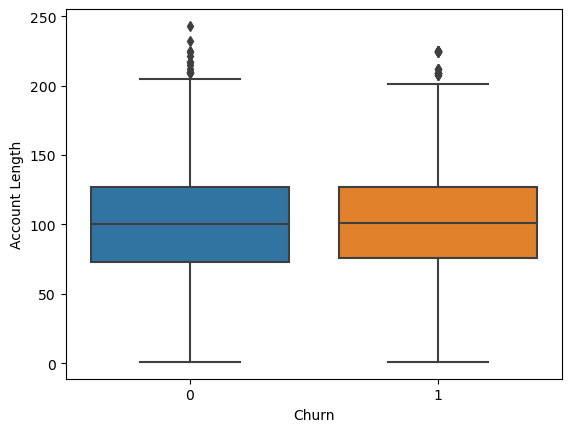

In [34]:
sns.boxplot(y=featureName, data= df_churn, x='Churn')

#### Does the Account Length feature relevant ?
- If we see median for both, its quite similar
- Hence this feature does not have any signficance and can be dropped

#### VMailMessage
- Number of voice-mail messages

<Axes: xlabel='Churn', ylabel='VMail Message'>

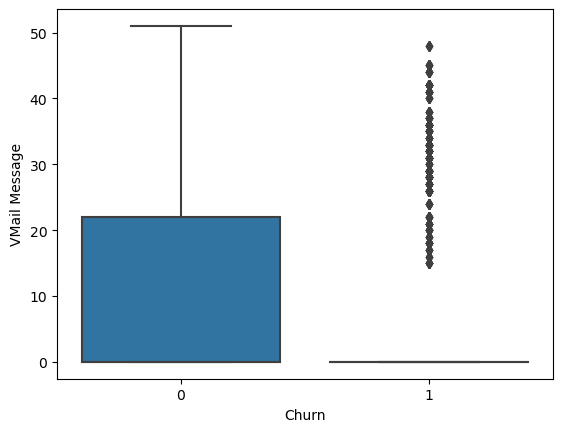

In [54]:
featureName = 'VMail Message'
sns.boxplot(x='Churn', y=featureName, data=df_churn)

* there are a lot of outliers for label 1. Hence we will not be taking this feature

### day_mins	
Total minutes of day calls

<Axes: xlabel='Churn', ylabel='Day Mins'>

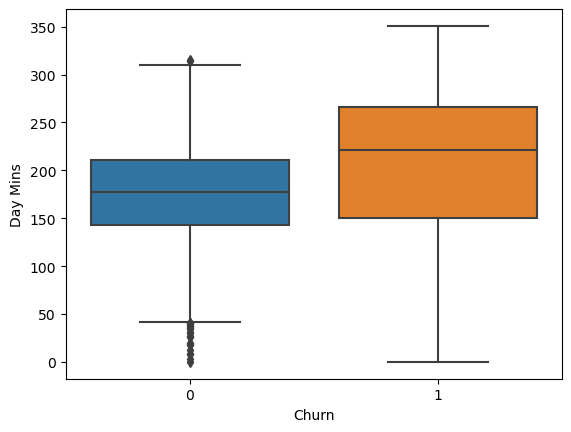

In [58]:
featureName = 'Day Mins'
sns.boxplot(x='Churn', y=featureName, data=df_churn)

* If there are more day mins then Customers likely to churn
* Customer who spent more time calling in a day tend to churn

C:\Users\Upendra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


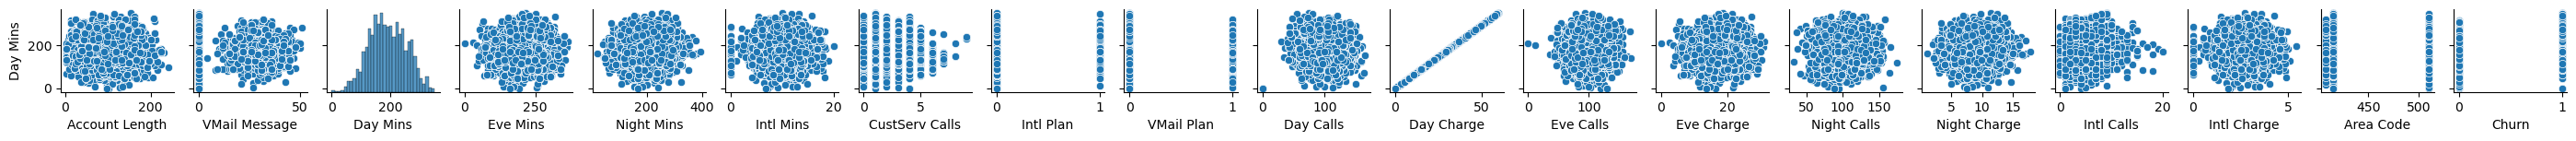

In [67]:
sns.pairplot(data=df_churn, y_vars=['Day Mins'], height=1.5, aspect=1)

In [76]:
df_churn[['Day Charge', 'Day Mins']].corr() 


,Day Charge,Day Mins
Day Charge,1.0,1.0
Day Mins,1.0,1.0


* Day Charge is highly correlated
* Hence we will just drop either one of them